In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import cv2
import matplotlib.pyplot as plt


cap = cv2.VideoCapture(0)  



ret, frame = cap.read()
cap.release()




(-0.5, 639.5, 479.5, -0.5)

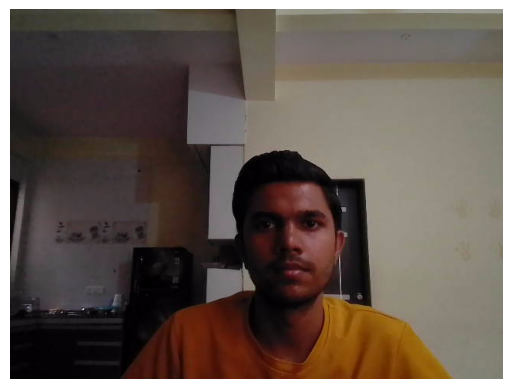

In [4]:
Image_RGB = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB) 
plt.imshow(Image_RGB)
plt.plot ()
plt.axis('off') 


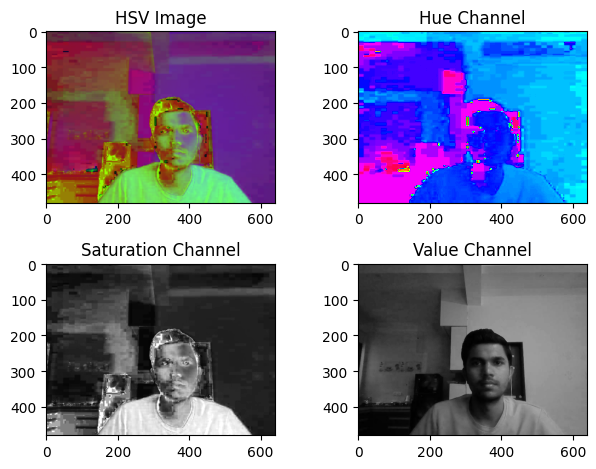

In [5]:
Image_HSV = cv2.cvtColor(frame, cv2.COLOR_RGB2HSV)



h_channel, s_channel, v_channel = cv2.split(Image_HSV)
plt.subplot(2,2,1)
plt.imshow(Image_HSV)
plt.title('HSV Image')

plt.subplot(2,2,2)
plt.imshow(h_channel, cmap='hsv')
plt.title('Hue Channel')

plt.subplot(2,2,3)
plt.imshow(s_channel, cmap='gray')
plt.title('Saturation Channel')

plt.subplot(2,2,4) 
plt.imshow(v_channel, cmap='gray')
plt.title('Value Channel')
plt.tight_layout()
plt.show()

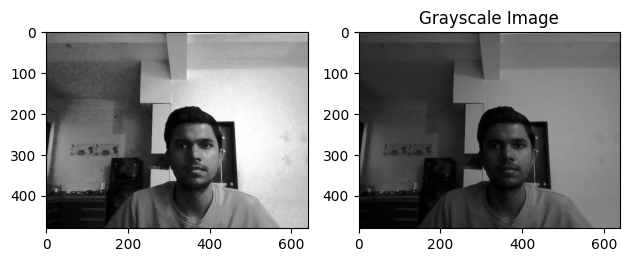

In [6]:

Image_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)


equalized_image = cv2.equalizeHist(Image_gray)



plt.subplot(1, 2, 1)
plt.imshow(equalized_image, cmap='gray')
3

plt.subplot(1, 2, 2)
plt.imshow(Image_gray, cmap='gray')
plt.title('Grayscale Image')

plt.tight_layout()
plt.show()

In [22]:
threshold_value = 90
max_value = 255
ret, Image_thresh = cv2.threshold(Image_gray, threshold_value, max_value, cv2.THRESH_BINARY_INV)


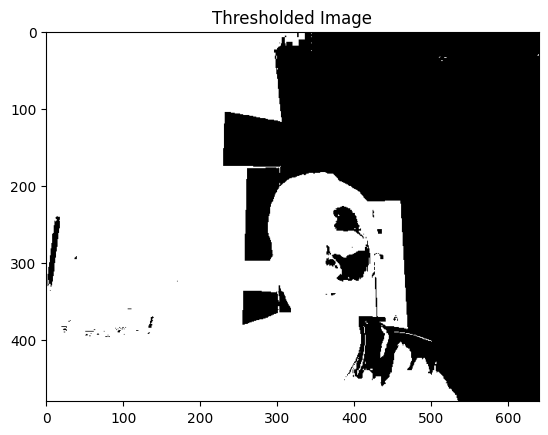

In [23]:
plt.imshow(Image_thresh, cmap='gray')
plt.title('Thresholded Image')  
plt.show()

In [9]:

bins = np.array([0, 64, 128, 192, 256])


midpoints = np.array([32, 96, 160, 224])

Image_flat = Image_gray.flatten()


bin_indices = np.digitize(Image_flat, bins) - 1  

posterized_flat = midpoints[bin_indices]


posterized_image = posterized_flat.reshape(Image_gray.shape).astype(np.uint8)


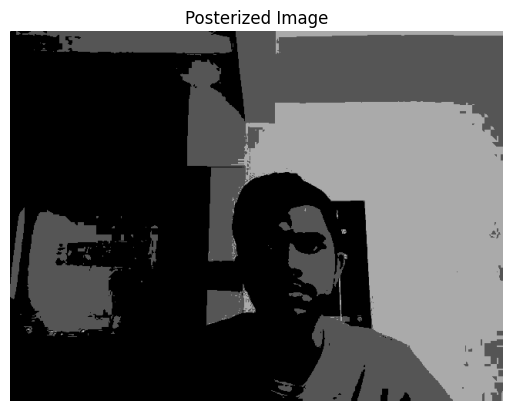

In [10]:
plt.imshow(posterized_image, cmap='gray')
plt.title('Posterized Image')
plt.axis('off')
plt.show()

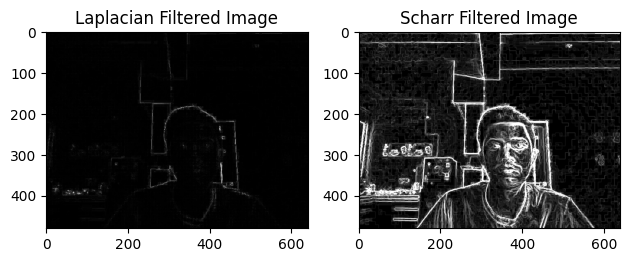

In [11]:

laplacian = cv2.Laplacian(Image_gray, cv2.CV_64F)
laplacian_image = cv2.convertScaleAbs(laplacian)

scharr_y = cv2.Scharr(Image_gray, cv2.CV_64F, 0, 1)
scharr_x = cv2.Scharr(Image_gray, cv2.CV_64F, 1, 0)

scharr = cv2.magnitude(scharr_x, scharr_y)
scharr_image = cv2.convertScaleAbs(scharr)


plt.subplot(1, 2, 1)
plt.imshow(laplacian_image, cmap='gray')    
plt.title('Laplacian Filtered Image')

plt.subplot(1, 2, 2)
plt.imshow(scharr_image, cmap='gray')
plt.title('Scharr Filtered Image')
plt.tight_layout()
plt.show()


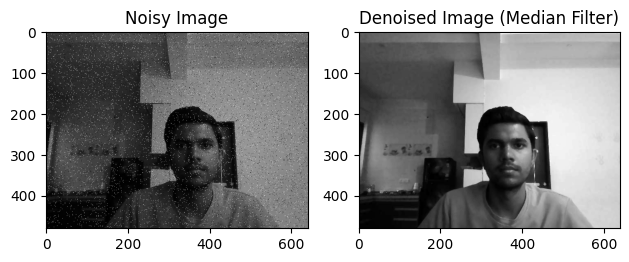

In [12]:
noisy_image = np.copy(Image_gray)
total_pixels = Image_gray.size

salt_prob = 0.02  
pepper_prob = 0.02

num_salt = np.ceil(salt_prob * total_pixels).astype(int)
coords = [np.random.randint(0, i - 1, num_salt) for i in Image_gray.shape]
noisy_image[coords[0], coords[1]] = 255

num_pepper = np.ceil(pepper_prob * total_pixels).astype(int)
coords = [np.random.randint(0, i - 1, num_pepper) for i in Image_gray.shape]
noisy_image[coords[0], coords[1]] = 0


denoised_img = cv2.medianBlur(noisy_image, 3)

plt.subplot(1, 2, 1)
plt.imshow(noisy_image, cmap='gray')    
plt.title('Noisy Image')

plt.subplot(1, 2, 2)
plt.imshow(denoised_img, cmap='gray')   
plt.title('Denoised Image (Median Filter)')

plt.tight_layout()
plt.show()



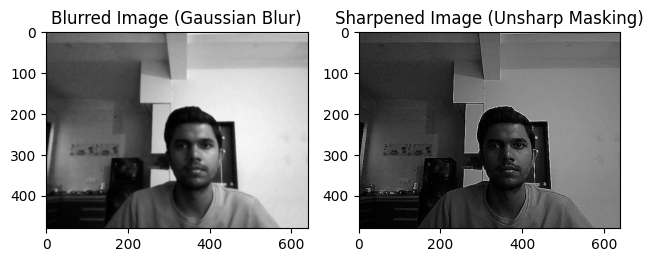

In [13]:

blurred = cv2.GaussianBlur(Image_gray, (5, 5), sigmaX=1.0)

mask = cv2.subtract(Image_gray, blurred)

amount = 5.0


sharpened = cv2.addWeighted(Image_gray, 1 + amount, blurred, -amount, 0)

plt.subplot(1, 2, 1)
plt.imshow(blurred, cmap='gray')
plt.title('Blurred Image (Gaussian Blur)')

plt.subplot(1, 2, 2)
plt.imshow(sharpened, cmap='gray')
plt.title('Sharpened Image (Unsharp Masking)')

plt.tight_layout()
plt.show()



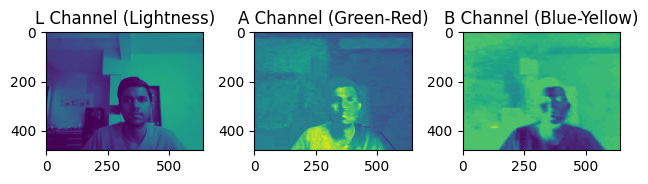

In [14]:

image_lab = cv2.cvtColor(Image_RGB, cv2.COLOR_BGR2LAB)


L_channel, A_channel, B_channel = cv2.split(image_lab)

plt.subplot(1, 3, 1)
plt.imshow(L_channel)
plt.title('L Channel (Lightness)')

plt.subplot(1, 3, 2)
plt.imshow(A_channel)  
plt.title('A Channel (Green-Red)')

plt.subplot(1, 3, 3)
plt.imshow(B_channel)  
plt.title('B Channel (Blue-Yellow)')

plt.tight_layout()
plt.show()



C:\Users\ASUS\AppData\Local\Temp\ipykernel_22612\2133614988.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,4,1)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_22612\2133614988.py:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,4,2)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_22612\2133614988.py:13: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,4,3)


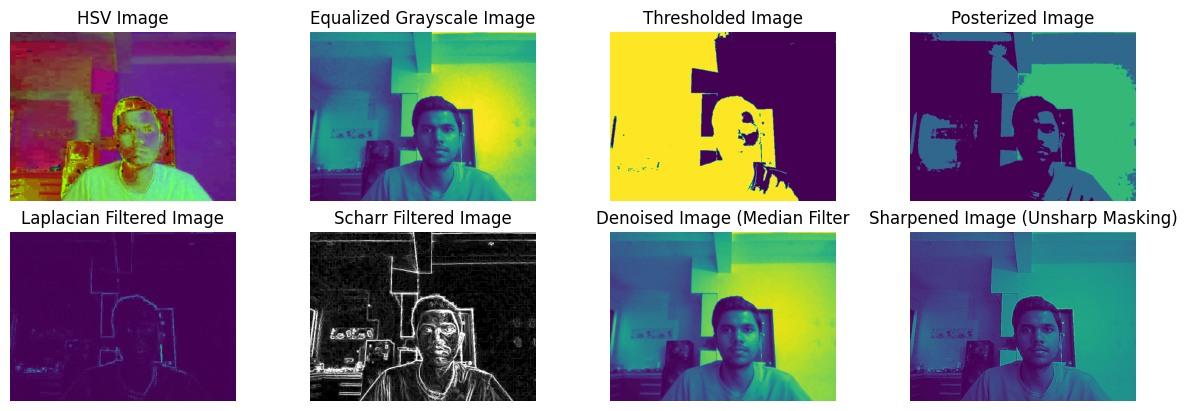

In [24]:
fig, axs = plt.subplots(1, 3, figsize=(12, 4), constrained_layout=True)

plt.subplot(2,4,1)
plt.imshow(Image_HSV)
plt.axis('off')
plt.title('HSV Image')

plt.subplot(2,4,2)
plt.imshow(equalized_image)
plt.axis('off')
plt.title('Equalized Grayscale Image')

plt.subplot(2,4,3)
plt.imshow(Image_thresh)
plt.axis('off')
plt.title('Thresholded Image')

plt.subplot(2,4,4)
plt.imshow(posterized_image)
plt.axis('off')
plt.title('Posterized Image')

plt.subplot(2,4,5)
plt.imshow(laplacian_image)
plt.axis('off')
plt.title('Laplacian Filtered Image')

plt.subplot(2,4,6)
plt.imshow(scharr_image, cmap='gray')
plt.axis('off')
plt.title('Scharr Filtered Image')

plt.subplot(2,4,7)
plt.imshow(denoised_img)
plt.axis('off')
plt.title('Denoised Image (Median Filter')

plt.subplot(2,4,8)
plt.imshow(sharpened)
plt.axis('off')
plt.title('Sharpened Image (Unsharp Masking)')


plt.axis('off')

plt.show()